<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# High School Students SAT Goals

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

In order for the high school students to adequately prepare for their admissions to  higher level education, it is important that they know what requirements that they should be achieving. This project aims to help the students establish a clear goal SAT score by exploring and comparing the SAT score trend across different colleges and majors.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

### Choose your Data

* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges

### Outside Research

University of Pennsylvania which went test optional in 2020 due to Covid-19 pandemic reported that 75% of studnets who were accpeted early admission submitted test scores [*source*](https://blog.prepscholar.com/do-you-have-to-take-the-sat).

Knowing the 75th percentile score of the program that the student wishes to apply to help in determining whether the school can be considered a 'safety' school.[*source*](https://www.cappex.com/articles/match-fit/what-are-safety-reach-and-match-schools#:~:text=A%20safety%20school%20is%20any,to%20their%20student%20body%20average.)

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Code:
def mean(numbers):
    return sum(numbers)/len(numbers)

numbers = [1,2,3,4,5,1,4,5]
mean(numbers)

3.125

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
# Code:
def st_dev(numbers):
    sigma = 0
    for number in numbers:
        sigma += (number - mean(numbers))**2
    return (sigma/len(numbers))**0.5

st_dev(numbers)

1.5360257159305635

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [3]:
# Code:
def perc_to_dec(percent):
    return float(percent.strip('%')) * 0.01

perc_to_dec('30.5%')

0.305

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [317]:
# Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [318]:
# Import the data that I will utilize:
by_majors = pd.read_csv('../data/sat_2019_by_intended_college_major.csv')
by_college = pd.read_csv('../data/sat_act_by_college.csv')
by_states = pd.read_csv('../data/sat_2019.csv')

In [319]:
by_majors.head()

,IntendedCollegeMajor,TestTakers,Percent,Total,ReadingWriting,Math
0,"Agriculture, AgricultureOperations, and Relate...","24,913",1%,977,496,481
1,Architecture and Related Services,"28,988",2%,1047,520,527
2,"Area, Ethnic, Cultural, and Gender Studies","2,629",0%,1040,536,504
3,Biological and Biomedical Sciences,"155,834",8%,1139,572,566
4,"Business, Management, Marketing, and Related S...","221,523",12%,1072,534,537


In [320]:
by_majors.shape

(38, 6)

In [321]:
by_majors.isnull().sum() #check if there is any null values

IntendedCollegeMajor    0
TestTakers              0
Percent                 0
Total                   0
ReadingWriting          0
Math                    0
dtype: int64

In [322]:
by_majors.dtypes # Need to convert TestTakers and Percent to number value 

IntendedCollegeMajor    object
TestTakers              object
Percent                 object
Total                    int64
ReadingWriting           int64
Math                     int64
dtype: object

In [323]:
# Use function to convert percent to decimal
by_majors['Percent'] = by_majors['Percent'].apply(perc_to_dec) 
by_majors[['Percent']].head()

,Percent
0,0.01
1,0.02
2,0.00
3,0.08
4,0.12


In [324]:
# Replace ',', then convert to integer
by_majors['TestTakers'] = by_majors['TestTakers'].apply(lambda x: int(x.replace(',', '')))
by_majors[['TestTakers']].head()

,TestTakers
0,24913
1,28988
2,2629
3,155834
4,221523


In [ ]:
# Rename columns
by_majors = by_majors.rename({'IntendedCollegeMajor':'intended_college_major', 
                                        'TestTakers':'test_takers', 
                                        'Percent':'percent',
                                        'Total':'total',
                                        'ReadingWriting':'reading_writing',
                                        'Math':'math'
                                       }, axis='columns')

In [326]:
# created new column called 'is_stem' using boolean filtering of whether or not the major is considered STEM.
by_majors['is_stem'] = (by_majors['intended_college_major'].str.lower()).str.contains('bio|computer|engineer|health|math|tech|physic|psych')

In [327]:
by_majors.head()

,intended_college_major,test_takers,percent,total,reading_writing,math,is_stem
0,"Agriculture, AgricultureOperations, and Relate...",24913,0.01,977,496,481,False
1,Architecture and Related Services,28988,0.02,1047,520,527,False
2,"Area, Ethnic, Cultural, and Gender Studies",2629,0.00,1040,536,504,False
3,Biological and Biomedical Sciences,155834,0.08,1139,572,566,True
4,"Business, Management, Marketing, and Related S...",221523,0.12,1072,534,537,False


In [358]:
by_college.head()

,School,Test Optional?,Applies to Class Year(s),Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,4.3%,1440-1570,32-35
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,4.7%,1460-1580,33-35
2,Princeton University,Yes,2021,Princeton has adopted a one-year test optional...,35370,5.5%,1440-1570,32-35
3,Columbia University,Yes,2021,Columbia has adopted a one-year test optional ...,40203,5.5%,1450-1560,33-35
4,Yale University,Yes,2021,Yale has adopted a one-year test optional poli...,36844,6.1%,1460-1570,33-35


In [359]:
by_college.shape

(416, 8)

In [360]:
# Null values don't seem to be getting in the way of calculation; will leave
by_college.isnull().sum()

School                             0
Test Optional?                     0
Applies to Class Year(s)          26
Policy Details                     0
Number of Applicants               0
Accept Rate                        0
SAT Total 25th-75th Percentile     0
ACT Total 25th-75th Percentile     0
dtype: int64

In [361]:
# Check each non-numeral columns
by_college['Applies to Class Year(s)'].value_counts()

2021                        196
All / Permanent Policy      158
2021 2022 2023               15
2021 2022                    11
2021 2022 2023 2024           9
2021 2022 2023 2024 2025      1
Name: Applies to Class Year(s), dtype: int64

In [362]:
by_college['Test Optional?'].value_counts()

Yes         347
No           26
Yes (TB)     25
Yes*         16
Yes (TF)      2
Name: Test Optional?, dtype: int64

In [363]:
by_college.dtypes

School                            object
Test Optional?                    object
Applies to Class Year(s)          object
Policy Details                    object
Number of Applicants               int64
Accept Rate                       object
SAT Total 25th-75th Percentile    object
ACT Total 25th-75th Percentile    object
dtype: object

In [364]:
# Split the 25th-75th percentile to make use as numerical values
by_college['sat_25th'] = by_college['SAT Total 25th-75th Percentile'].str.split('-', expand = True)[0]
by_college['sat_75th'] = by_college['SAT Total 25th-75th Percentile'].str.split('-', expand = True)[1]

In [365]:
# Replace the empty string cells with np.nan to be able to convert to float
by_college['sat_25th'] = by_college['sat_25th'].replace('', np.nan)
by_college['sat_75th'] = by_college['sat_75th'].replace('', np.nan)

In [366]:
by_college = by_college[(by_college['sat_25th'].notnull()) & by_college['sat_75th'].notnull()]

In [367]:
def get_nonnumeric_vals(vals):
  non_numeric = set()
  for val in vals:
    try:
      float(val)
    except ValueError:
      non_numeric.add(val)
  return non_numeric

In [368]:
# 'sat_25th' has some non-numeric values, will replace and convert to float
get_nonnumeric_vals(by_college['sat_25th'])

{'\u200b\u200b 1440',
 '\u200b\u200b 1490',
 '\u200b\u200b 1500',
 '\u200b\u200b 1530'}

In [369]:
by_college['sat_25th'] = by_college['sat_25th'].apply(lambda x: float(x.replace('\u200b\u200b', '')))

In [370]:
by_college['sat_75th'] = by_college['sat_75th'].apply(lambda x: float(x))

In [371]:
# drop unwanted columns
by_college.drop('SAT Total 25th-75th Percentile', axis='columns', inplace=True)

In [372]:
by_college.drop('ACT Total 25th-75th Percentile', axis='columns', inplace=True)

In [373]:
# convert percentage to decimals 
by_college['Accept Rate'] = by_college['Accept Rate'].apply(perc_to_dec)

In [374]:
by_college.drop('Policy Details', axis='columns', inplace=True)

In [375]:
# Rename columns
by_college = by_college.rename({'School':'school', 
                                            'Test Optional?':'test_optional', 
                                            'Applies to Class Year(s)':'for_class_year',
                                            'Number of Applicants':'n_applicants',
                                            'Accept Rate':'acceptance_rate'
                                           }, axis='columns')

In [376]:
# Add a column with calculated median to be able to compare the central tendency
by_college['sat_median'] = (by_college['sat_25th']+by_college['sat_75th'])/2
by_college.head()

,school,test_optional,for_class_year,n_applicants,acceptance_rate,sat_25th,sat_75th,sat_median
0,Stanford University,Yes,2021,47452,0.043,1440.0,1570.0,1505.0
1,Harvard College,Yes,2021,42749,0.047,1460.0,1580.0,1520.0
2,Princeton University,Yes,2021,35370,0.055,1440.0,1570.0,1505.0
3,Columbia University,Yes,2021,40203,0.055,1450.0,1560.0,1505.0
4,Yale University,Yes,2021,36844,0.061,1460.0,1570.0,1515.0


In [385]:
by_states.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [386]:
by_states.dtypes

State                 object
Participation Rate    object
EBRW                   int64
Math                   int64
Total                  int64
dtype: object

In [379]:
# look for non-numeric values 
def get_nonnumeric_vals(vals):
  non_numeric = set()
  for val in vals:
    try:
      int(perc_to_dec(val))
    except ValueError:
      non_numeric.add(val.strip('%'))
  return non_numeric

In [387]:
get_nonnumeric_vals(by_states['Participation Rate'])

{'—'}

In [388]:
by_states[by_states['Participation Rate'].str.contains('—')]

,State,Participation Rate,EBRW,Math,Total
39,Puerto Rico,—,483,462,944
47,Virgin Islands,—,490,445,935


In [389]:
# convert the non numeric black string to np.nan for future use
by_states['Participation Rate'] = by_states['Participation Rate'].replace('—', np.nan)

In [391]:
# percentage to decimal
by_states['Participation Rate'] = by_states['Participation Rate'].map(perc_to_dec, na_action='ignore')

In [392]:
# rename columns
by_states = by_states.rename({'State':'state', 
                                    'Participation Rate':'participation_rate', 
                                    'EBRW':'ebrw',
                                    'Math':'math',
                                    'Total':'total'
                                   }, axis='columns')

In [393]:
by_college.head()

,school,test_optional,for_class_year,n_applicants,acceptance_rate,sat_25th,sat_75th,sat_median
0,Stanford University,Yes,2021,47452,0.043,1440.0,1570.0,1505.0
1,Harvard College,Yes,2021,42749,0.047,1460.0,1580.0,1520.0
2,Princeton University,Yes,2021,35370,0.055,1440.0,1570.0,1505.0
3,Columbia University,Yes,2021,40203,0.055,1450.0,1560.0,1505.0
4,Yale University,Yes,2021,36844,0.061,1460.0,1570.0,1515.0


In [394]:
by_majors.head()

,intended_college_major,test_takers,percent,total,reading_writing,math,is_stem
0,"Agriculture, AgricultureOperations, and Relate...",24913,0.01,977,496,481,False
1,Architecture and Related Services,28988,0.02,1047,520,527,False
2,"Area, Ethnic, Cultural, and Gender Studies",2629,0.00,1040,536,504,False
3,Biological and Biomedical Sciences,155834,0.08,1139,572,566,True
4,"Business, Management, Marketing, and Related S...",221523,0.12,1072,534,537,False


In [395]:
by_states.head()

,state,participation_rate,ebrw,math,total
0,Alabama,0.07,583,560,1143
1,Alaska,0.41,556,541,1097
2,Arizona,0.31,569,565,1134
3,Arkansas,0.06,582,559,1141
4,California,0.63,534,531,1065


In [396]:
# Export the cleaned data
by_states.to_csv('../data/state-sat-scores-2019.csv', index=False)
by_college.to_csv('../data/scores-colleges.csv', index=False)
by_majors.to_csv('../data/score-majors.csv', index=False)

### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**school**|*object*|scores_colleges|Name of the college/university where the information comes from.| 
|**test_optional**|*object*|scores_colleges|If the standardized test was optional for 2021 admission.|
|**for_class_year**|*object*|scores_colleges|In which years will the standardized test be optional for.| 
|**n_applicants**|*integer*|scores_colleges|Number of applicants to the given school.|
|**acceptance_rate**|*float*|scores_colleges|Percent accepted to the school out of the whole applicants.| 
|**sat_25th**|*float*|scores_colleges|25th percentile SAT score of the people accepted.| 
|**sat_75th**|*float*|scores_colleges|75th percentile SAT score of the people accepted.| 
|**sat_median**|*float*|scores_colleges|50th percentile/median score of the people accepted.| 
|**intended_college_major**|*object*|score-majors|Name of the major that the information directs to.| 
|**test_takers**|*integer*|score-majors|Number of test_takers who applied to the given major.| 
|**percent**|*float*|score-majors|Proportion of the applicants to the given major over the pool of applicants to all majors.| 
|**total**|*integer*|score-majors|Mean of total of reading, writing, math SAT scores| 
|**reading_writing**|*integer*|score-majors|Mean reading and writing score of the given major| 
|**math**|*integer*|score-majors|Mean math SAT score of the given major.| 
|**is_stem**|*boolean*|score-majors|Indicates whether the given major is considered STEM.| 
|**state**|*object*|state-sat-scores-2019|The name of the state in which the information belongs to.| 
|**participation_rate**|*float*|Proportion of the students of the states who participated in the SAT.| 
|**ebrw**|*integer*|state-sat-scores-2019|Mean reading and writing SAT score.| 
|**math**|*integer*|state-sat-scores-2019|Mean math SAT score.| 
|**total**|*integer*|state-sat-scores-2019|Mean SAT total score.| 


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [63]:
#exported data import
by_college = pd.read_csv('../data/scores-colleges.csv')
by_majors = pd.read_csv('../data/score-majors.csv')
by_states = pd.read_csv('../data/state-sat-scores-2019.csv')

In [64]:
# All data in the right type
by_college.dtypes

school              object
test_optional       object
for_class_year      object
n_applicants         int64
acceptance_rate    float64
sat_25th           float64
sat_75th             int64
dtype: object

In [65]:
by_college.describe().T

,count,mean,std,min,25%,50%,75%,max
n_applicants,410.0,17586.614634,17533.678784,211.000,5374.50000,11715.5000,24046.750,111322.000
acceptance_rate,410.0,0.553344,0.241454,0.043,0.36875,0.6095,0.741,0.999
sat_25th,410.0,1167.008537,129.586121,793.000,1070.00000,1150.0000,1250.000,1530.000
sat_75th,410.0,1358.892683,111.431443,1050.000,1270.00000,1350.0000,1440.000,1580.000


In [66]:
# Dictionary comprehension
by_college_sd = {column: st_dev(list(by_college[column])) for column in by_college.columns if not pd.api.types.is_object_dtype(by_college[column])}
by_college_sd

{'n_applicants': 17512.283194814878,
 'acceptance_rate': 0.24115986252294971,
 'sat_25th': 129.4279931658202,
 'sat_75th': 111.29546785908504}

In [67]:
by_majors.dtypes

intended_college_major     object
test_takers                 int64
percent                   float64
total                       int64
reading_writing             int64
math                        int64
dtype: object

In [68]:
by_majors.describe().T

,count,mean,std,min,25%,50%,75%,max
test_takers,38.0,48394.500000,72753.092558,283.0,6611.00,16370.50,60215.750,331026.00
percent,38.0,0.025789,0.039975,0.0,0.00,0.01,0.035,0.18
total,38.0,1058.500000,82.445969,916.0,988.25,1066.50,1115.500,1242.00
reading_writing,38.0,535.500000,41.362439,458.0,501.25,537.00,569.750,597.00
math,38.0,523.000000,43.386385,456.0,486.50,527.00,542.250,646.00


In [69]:
by_majors_sd = {column: st_dev(list(by_majors[column])) for column in by_majors.columns if not pd.api.types.is_object_dtype(by_majors[column])}
by_majors_sd

{'test_takers': 71789.43289002257,
 'percent': 0.03944560404747735,
 'total': 81.35392139482761,
 'reading_writing': 40.814567832679806,
 'math': 42.811705236572365}

In [71]:
by_states.dtypes

state                  object
participation_rate    float64
ebrw                    int64
math                    int64
total                   int64
dtype: object

In [72]:
by_states.describe().T

,count,mean,std,min,25%,50%,75%,max
participation_rate,51.0,0.490588,0.387476,0.02,0.055,0.54,0.82,1.0
ebrw,53.0,558.000000,47.554422,483.00,518.000,550.00,610.00,636.0
math,53.0,548.471698,53.785044,445.00,506.000,545.00,596.00,648.0
total,53.0,1106.528302,100.994784,935.00,1024.000,1097.00,1200.00,1284.0


In [73]:
by_states_sd = {column: st_dev(list(by_states[column])) for column in by_states.columns if not pd.api.types.is_object_dtype(by_states[column])}
by_states_sd

{'participation_rate': nan,
 'ebrw': 47.10365927378819,
 'math': 53.27522124781091,
 'total': 100.03746539183244}

In [75]:
# mean by stem vs not stem
by_majors.groupby('is_stem').mean()

,test_takers,percent,total,reading_writing,math
is_stem,,,,,
False,32577.892857,0.0175,1046.107143,532.5,513.642857
True,92681.000000,0.0490,1093.200000,543.9,549.200000


In [123]:
# Which major is the most popular?
by_majors.sort_values('test_takers', ascending=False).head()

,intended_college_major,test_takers,percent,total,reading_writing,math,is_stem
14,Health Professions and related Clinical Sciences,331026,0.18,1048,529,518,True
4,"Business, Management, Marketing, and Related S...",221523,0.12,1072,534,537,False
9,Engineering,194127,0.11,1139,559,581,True
3,Biological and Biomedical Sciences,155834,0.08,1139,572,566,True
35,"Visual and Performing Arts, General",130642,0.07,1045,536,510,False


In [76]:
# Which school can be considered 'safety school' based on CA mean score?
safety_ca_mean = by_college[by_college['sat_75th'] < 1065] # Mean sat score of CA is 1065
safety_ca_mean

,school,test_optional,for_class_year,n_applicants,acceptance_rate,sat_25th,sat_75th
409,University of Texas El Paso,No,NaN,7157,0.999,820.0,1050


In [77]:
# Create a dictionary of number of 'safety school' by each state mean
n_safety = {state:len((by_college[by_college['sat_75th'] < int(by_states.loc[by_states['state']==state, 'total'])]).index) for state in by_states['state'].tolist()}

In [78]:
n_safety

{'Alabama': 8,
 'Alaska': 4,
 'Arizona': 7,
 'Arkansas': 8,
 'California': 1,
 'Colorado': 0,
 'Connecticut': 0,
 'Delaware': 0,
 'District of Columbia': 0,
 'Florida': 0,
 'Georgia': 1,
 'Hawaii': 4,
 'Idaho': 0,
 'Illinois': 0,
 'Indiana': 2,
 'Iowa': 61,
 'Kansas': 61,
 'Kentucky': 53,
 'Louisiana': 23,
 'Maine': 0,
 'Maryland': 1,
 'Massachusetts': 4,
 'Michigan': 0,
 'Minnesota': 113,
 'Mississippi': 53,
 'Missouri': 53,
 'Montana': 23,
 'Nebraska': 76,
 'Nevada': 9,
 'New Hampshire': 1,
 'New Jersey': 3,
 'New Mexico': 1,
 'New York': 1,
 'North Carolina': 4,
 'North Dakota': 90,
 'Ohio': 4,
 'Oklahoma': 0,
 'Oregon': 4,
 'Pennsylvania': 3,
 'Puerto Rico': 0,
 'Rhode Island': 0,
 'South Carolina': 0,
 'South Dakota': 91,
 'Tennessee': 38,
 'Texas': 0,
 'Utah': 44,
 'Vermont': 4,
 'Virgin Islands': 0,
 'Virginia': 4,
 'Washington': 1,
 'West Virginia': 0,
 'Wisconsin': 113,
 'Wyoming': 53}

In [79]:
# map the information to the new column 
by_states['n_safety_schools'] = by_states['state'].map(n_safety)

In [80]:
by_states.head()

,state,participation_rate,ebrw,math,total,n_safety_schools
0,Alabama,0.07,583,560,1143,8
1,Alaska,0.41,556,541,1097,4
2,Arizona,0.31,569,565,1134,7
3,Arkansas,0.06,582,559,1141,8
4,California,0.63,534,531,1065,1


In [81]:
# What are the states with top SAT score?
states_sorted = by_states.sort_values('total', ascending=False)
states_sorted

,state,participation_rate,ebrw,math,total,n_safety_schools
23,Minnesota,0.04,636,648,1284,113
51,Wisconsin,0.03,635,648,1283,113
42,South Dakota,0.03,633,635,1268,91
34,North Dakota,0.02,627,636,1263,90
27,Nebraska,0.03,628,631,1260,76
15,Iowa,0.03,622,622,1244,61
16,Kansas,0.04,618,623,1241,61
52,Wyoming,0.03,623,615,1238,53
24,Mississippi,0.03,628,608,1237,53
25,Missouri,0.04,622,615,1236,53


In [397]:
# what are the majors that require highest SAT scores?
by_college.sort_values('sat_median', ascending=False).head()

,school,test_optional,for_class_year,n_applicants,acceptance_rate,sat_25th,sat_75th,sat_median
5,California Institute of Technology,Yes (TB),2021 2022,8367,0.064,1530.0,1560.0,1545.0
6,Massachusetts Institute of Technology,Yes,2021,21706,0.067,1500.0,1570.0,1535.0
31,Harvey Mudd College,Yes,2021,4045,0.137,1490.0,1570.0,1530.0
8,University of Chicago,Yes,All / Permanent Policy,32283,0.073,1490.0,1570.0,1530.0
35,Washington University in St. Louis,Yes,2021,31320,0.150,1470.0,1570.0,1520.0


In [84]:
# What are the schools that require lowest SAT score?
by_college.sort_values('sat_median', ascending=False).tail()

,school,test_optional,for_class_year,n_applicants,acceptance_rate,sat_25th,sat_75th,sat_median
180,California State University--Northridge,Yes (TB),2021,30637,0.593,910.0,1130,1020.0
246,California State University--San Bernardino,Yes (TB),2021,16307,0.686,910.0,1090,1000.0
101,California State University--Los Angeles,Yes (TB),2021,39854,0.390,890.0,1080,985.0
396,Gallaudet University,No,NaN,496,0.571,793.0,1078,935.5
409,University of Texas El Paso,No,NaN,7157,0.999,820.0,1050,935.0


**To-Do:** *Edit this cell with your findings on trends in the data (step 3 above).*

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### 1. Heatmap

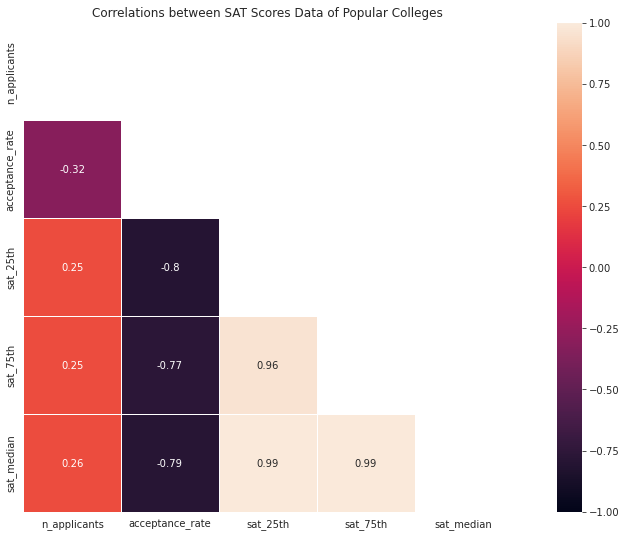

In [89]:
# relationship between number of applicants and median sat score
plt.figure(figsize=(16,9))
corr = by_college.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
    sns.heatmap(corr, 
                mask=mask, 
                square=True, 
                annot=True, 
                vmin=-1, 
                vmax=1, 
                linewidths=0.5).set(title = 'Correlations between SAT Scores Data of Popular Colleges')

-> Note the correlation between acceptance_rate and sat_mean. 

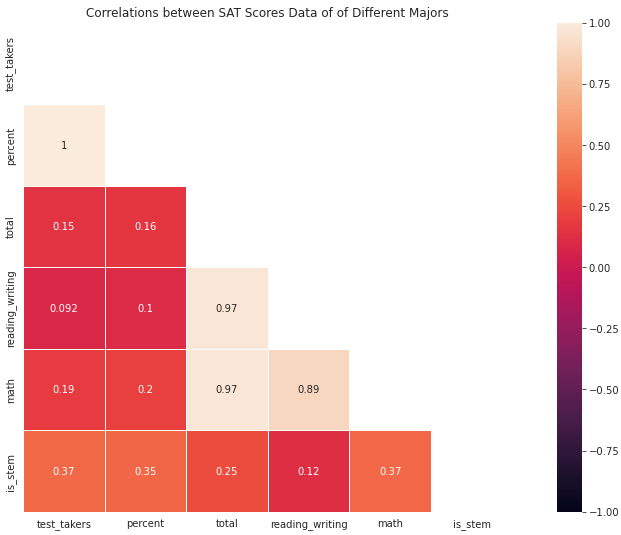

In [91]:
plt.figure(figsize=(16,9))
corr = by_majors.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
    sns.heatmap(corr, 
                mask=mask, 
                square=True, 
                annot=True, 
                vmin=-1, 
                vmax=1, 
                linewidths=0.5).set(title = 'Correlations between SAT Scores Data of of Different Majors')

-> No notable correlation; it makes sense that total score is correlated to math and reading&writing individual scores. 

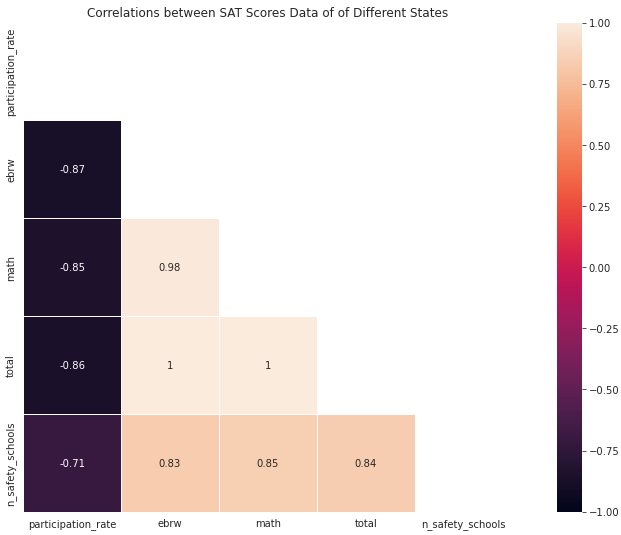

In [92]:
plt.figure(figsize=(16,9))
corr = by_states.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
    sns.heatmap(corr, 
                mask=mask, 
                square=True, 
                annot=True, 
                vmin=-1, 
                vmax=1, 
                linewidths=0.5).set(title = 'Correlations between SAT Scores Data of of Different States')

-> SAT score is negatively correlated with student SAT scores in each state.

#### 2. Histograms

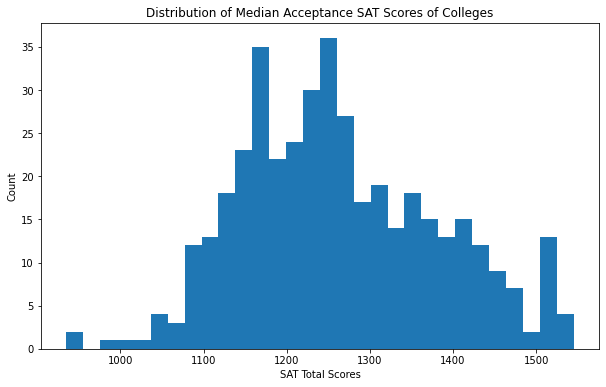

In [114]:
plt.figure(figsize=(10, 6))
plt.hist(by_college.sat_median,
         bins = 30
        )

plt.title('Distribution of Median Acceptance SAT Scores of Colleges')
plt.xlabel('SAT Total Scores')
plt.ylabel('Count');


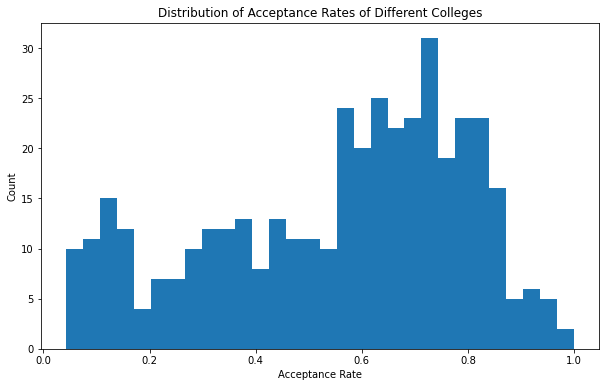

In [115]:
plt.figure(figsize=(10, 6))
plt.hist(by_college.acceptance_rate,
         bins = 30
        )

plt.title('Distribution of Acceptance Rates of Different Colleges')
plt.xlabel('Acceptance Rate')
plt.ylabel('Count');

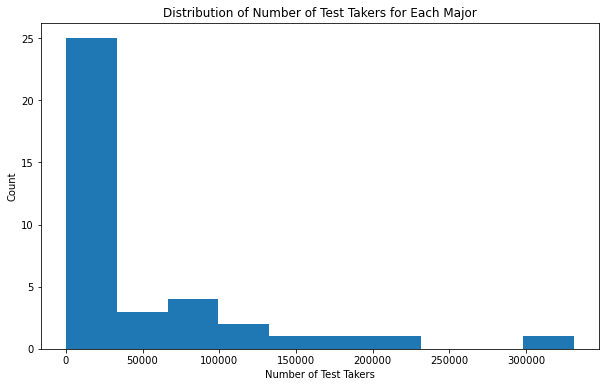

In [119]:
plt.figure(figsize=(10, 6))
plt.hist(by_majors.test_takers,
         bins = 10
        )

plt.title('Distribution of Number of Test Takers for Each Major')
plt.xlabel('Number of Test Takers')
plt.ylabel('Count');

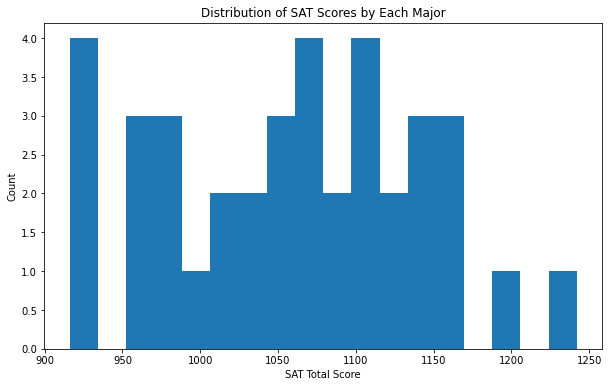

In [130]:
plt.figure(figsize=(10, 6))
plt.hist(by_majors.total,
         bins = 18
        )

plt.title('Distribution of SAT Scores by Each Major')
plt.xlabel('SAT Total Score')
plt.ylabel('Count');

In [400]:
# create string type column converted from boolean 'is_stem' values
by_majors['is_stem_str'] = by_majors['is_stem'].astype('string')

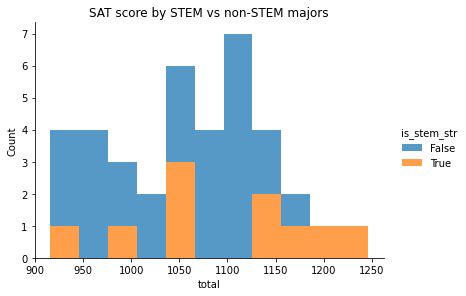

In [401]:
sns.displot(by_majors,
            x = 'total',
            hue = 'is_stem_str', 
            binwidth = 30,
            height = 4,            
            aspect = 1.4,
            edgecolor = 'none',
            multiple = 'stack'
           ).set(title = 'SAT score by STEM vs non-STEM majors');

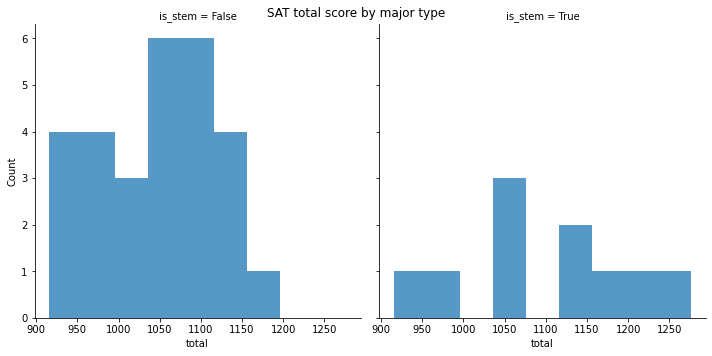

In [144]:
sns.displot(by_majors,
            x = 'total',
            binwidth = 40,
            col = 'is_stem',
            edgecolor = 'none'
           ).fig.suptitle('SAT total score by major type');

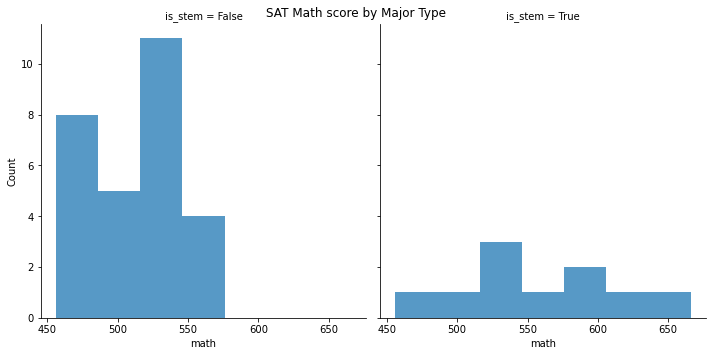

In [143]:
sns.displot(by_majors,
            x = 'math',
            binwidth = 30,
            col = 'is_stem',
            edgecolor = 'none'
           ).fig.suptitle('SAT Math score by Major Type');

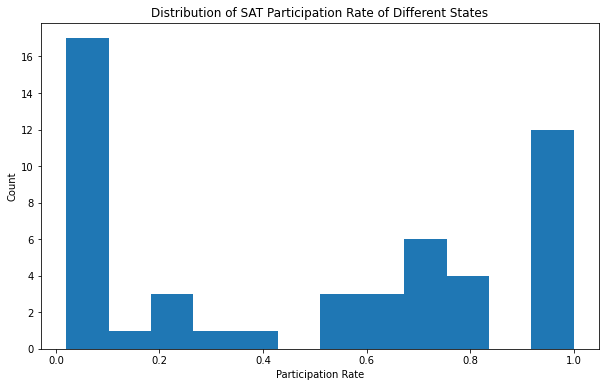

In [149]:
plt.figure(figsize=(10, 6))
plt.hist(by_states.participation_rate,
         bins = 12
        )

plt.title('Distribution of SAT Participation Rate of Different States')
plt.xlabel('Participation Rate')
plt.ylabel('Count');

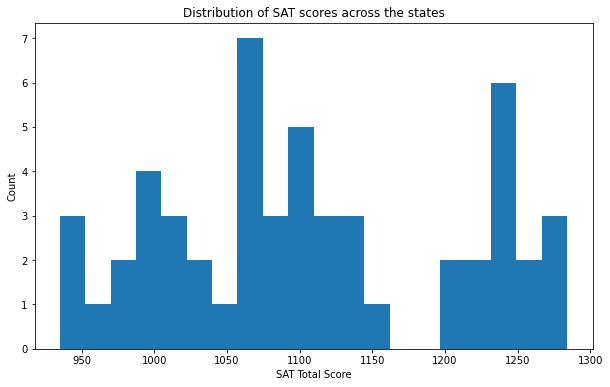

In [214]:
plt.figure(figsize=(10, 6))
plt.hist(by_states.total,
         bins = 20
        )

plt.title('Distribution of SAT scores across the states')
plt.xlabel('SAT Total Score')
plt.ylabel('Count');

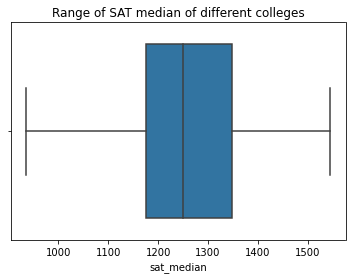

In [402]:
sns.boxplot(x='sat_median', data=by_college).set(title='Range of SAT median of different colleges');

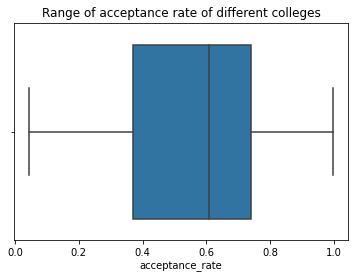

In [403]:
sns.boxplot(x='acceptance_rate', data=by_college).set(title='Range of acceptance rate of different colleges');

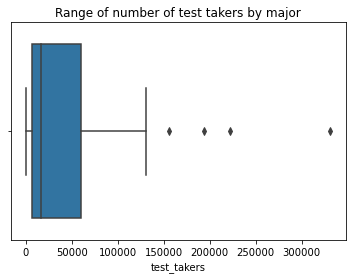

In [216]:
sns.boxplot(x='test_takers', data=by_majors).set(title='Range of number of test takers by major');

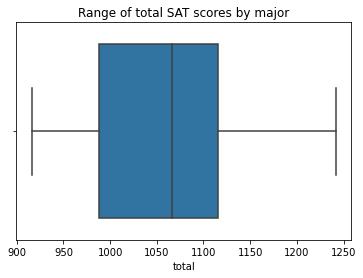

In [215]:
sns.boxplot(x='total', data=by_majors).set(title='Range of total SAT scores by major');

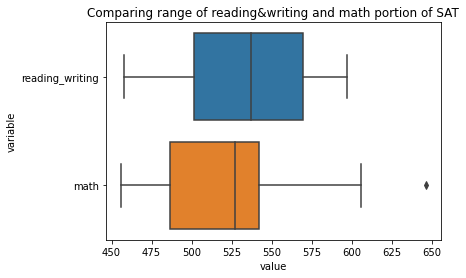

In [404]:
by_majors_scores = pd.melt(by_majors[['reading_writing', 'math']])
sns.boxplot(x='value', y='variable', data=by_majors_scores).set(title='Comparing range of reading&writing and math portion of SAT');

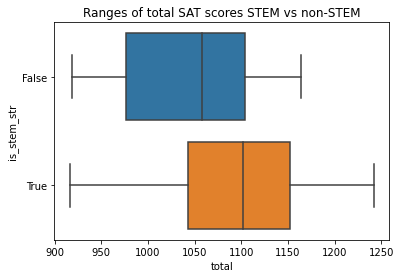

In [261]:
by_majors['is_stem_str'] = by_majors['is_stem'].astype('string')
sns.boxplot(x='total', y='is_stem_str', data=by_majors).set(title='Ranges of total SAT scores STEM vs non-STEM');

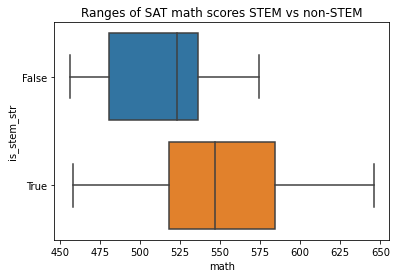

In [262]:
sns.boxplot(x='math', y='is_stem_str', data=by_majors).set(title='Ranges of SAT math scores STEM vs non-STEM');

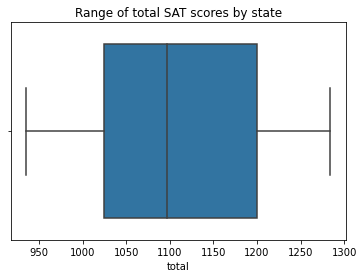

In [406]:
sns.boxplot(x='total', data=by_states).set(title='Range of total SAT scores by state');

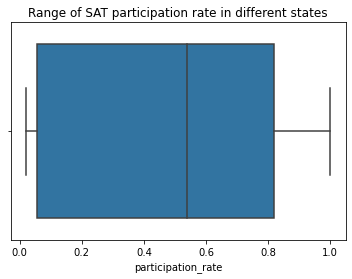

In [408]:
sns.boxplot(x='participation_rate', data=by_states).set(title='Range of SAT participation rate in different states');

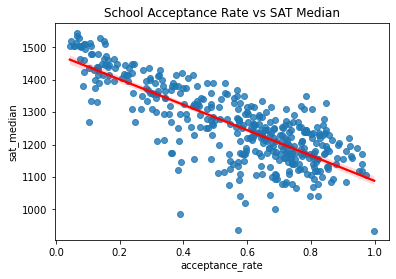

In [267]:
sns.regplot(data = by_college,
            x = 'acceptance_rate',
            y = 'sat_median',
            line_kws = {'color':'red'}
            ).set(title = 'School Acceptance Rate vs SAT Median');

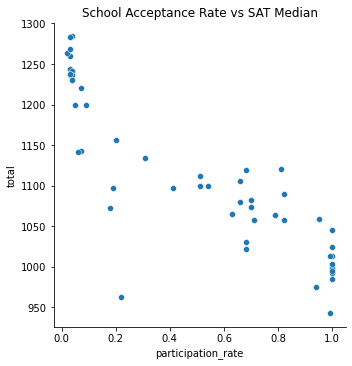

In [190]:
sns.relplot(data = by_states,
            x = 'participation_rate',
            y = 'total'
           ).set(title = 'School Acceptance Rate vs SAT Median');

In [199]:
# create bar plot variables
yes_stem = by_majors['total'][by_majors['is_stem'] == True]
not_stem = by_majors['total'][by_majors['is_stem'] == False]

Text(0.5, 1.0, 'Mean Score of STEM')

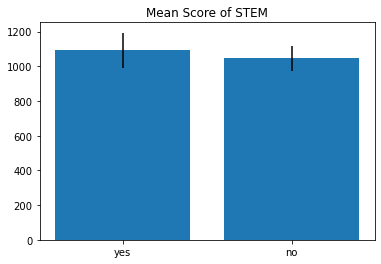

In [211]:
plt.bar(['yes', 'no'],
        [yes_stem.mean(), not_stem.mean()],
        yerr = [yes_stem.std(), not_stem.std()]
       )

plt.title('Mean Score of STEM')

In [212]:
yes_stem_math = by_majors['math'][by_majors['is_stem'] == True]
not_stem_math = by_majors['math'][by_majors['is_stem'] == False]

Text(0.5, 1.0, 'Mean Math Score of STEM')

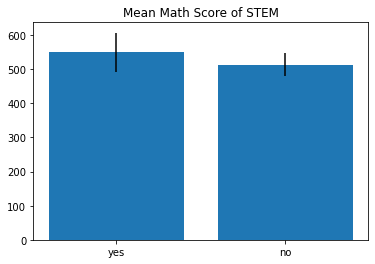

In [409]:
plt.bar(['yes', 'no'],
        [yes_stem_math.mean(), not_stem_math.mean()],
        yerr = [yes_stem_math.std(), not_stem_math.std()]
       )

plt.title('Mean Math Score of STEM')

In [238]:
states_to_graph = by_states.sort_values('total', ascending=False)['state'].head(3).tolist() + by_states['state'][by_states['state'] == 'California'].tolist() + by_states.sort_values('total', ascending=False)['state'].tail(3).tolist()
state_scores = [int(by_states.loc[by_states['state']==state, 'total']) for state in states_to_graph]

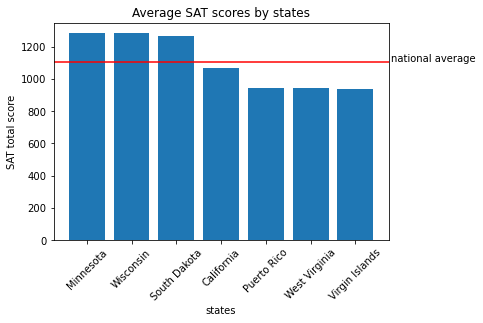

In [305]:
# Code
plt.figure()
plt.bar(states_to_graph, state_scores)
plt.axhline(by_states['total'].mean(), color='red')
plt.text(6.8, by_states['total'].mean(), 'national average')
plt.xticks(rotation=45)
plt.xlabel('states')
plt.ylabel('SAT total score')
plt.title('Average SAT scores by states');

In [270]:
by_college['test_optional'].value_counts()

Yes         344
Yes (TB)     25
No           25
Yes*         14
Yes (TF)      2
Name: test_optional, dtype: int64

In [296]:
by_college['for_class_year'].value_counts()

2021                        196
All / Permanent Policy      153
2021 2022 2023               15
2021 2022                    11
2021 2022 2023 2024           9
2021 2022 2023 2024 2025      1
Name: for_class_year, dtype: int64

In [299]:
n_permanent = by_college['for_class_year'].value_counts()['All / Permanent Policy']
n_not_permanent = sum(by_college['for_class_year'].value_counts()[['2021', '2021 2022 2023', '2021 2022', '2021 2022 2023 2024', '2021 2022 2023 2024 2025']])

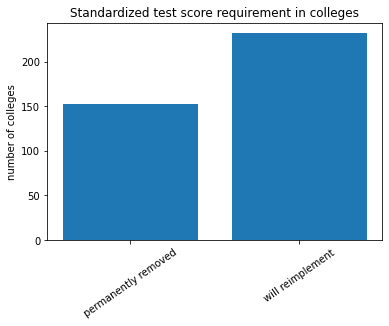

In [306]:
plt.bar(['permanently removed', 'will reimplement'],
        [n_permanent, n_not_permanent])
plt.xticks(rotation=35)
plt.title('Standardized test score requirement in colleges')
plt.ylabel('number of colleges');

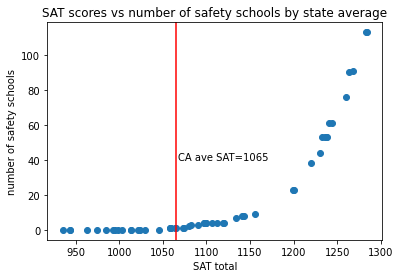

In [315]:
plt.figure()
plt.scatter(x = by_states['total'],
            y = by_states['n_safety_schools'])

plt.title('SAT scores vs number of safety schools by state average')
plt.xlabel('SAT total')
plt.ylabel('number of safety schools')
plt.axvline(1065, color='red')
plt.text(1067, 40, 'CA ave SAT=1065');

## Conclusions and Recommendations

Looking at the average SAT score of CA, there are many students who need to work toward higher SAT score if they aim to go to the colleges in the given list. Student who wish to enter as a STEM major need to aim for higher score, especially math. Using the acceptance rate as an indicator of prestigious school, students who aim to go to the prestigious schools also need to aim for higher SAT score.  